In [1]:
pip install transformers nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.4/182.4 KB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 22.6 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib
import matplotlib.pyplot as plt
import nltk 
import seaborn as sns
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
%matplotlib inline


# Load Huggingface transformers
from transformers import TFBertModel,  BertConfig, BertTokenizerFast, TFAutoModel

# Then what you need from tensorflow.keras
from tensorflow.keras.layers import Input, Dropout, Dense, GlobalAveragePooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.initializers import TruncatedNormal
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy
from tensorflow.keras.utils import to_categorical

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import re,string,unicodedata
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,ExtraTreesClassifier
from collections import Counter
import string

import warnings
warnings.filterwarnings('ignore')
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from mlxtend.plotting import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier

# 1. Convert text into vectors using TF-IDF
# 2. Instantiate MultinomialNB classifier
# 3. Split feature and label
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split

nltk.download('punkt')
stopwords = nltk.download('stopwords')
stop_words = nltk.corpus.stopwords.words('english')

pd.set_option('display.max_colwidth', 100)

# model save & load
import pickle

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
exclude = set(",.:;~'\"“-”()?!_/´`%@#&*")
def removePunctuation(txt):
    return ''.join([(c if c not in exclude else " ") for c in txt])
    
def removeNumbers(txt):
    return ''.join(c for c in txt if not c.isnumeric())

def removeStopwords(txt):
    return ' '.join(w for w in word_tokenize(txt) if not w.lower() in stop_words)

In [5]:
def showBar(trump, musk, title):
  fig = plt.figure()
  ax = fig.add_axes([0,0,1,1])
  height = [trump, musk]
  bars = ('Trump - ' + str(trump), 'Musk - ' + str(musk))
  x_pos = np.arange(len(bars))
  plt.title(title)
  plt.bar(x_pos, height, color=[ 'red', 'blue'])
  plt.xticks(x_pos, bars)
  plt.show()

In [6]:
def saveModel(model, modelName):
  pickle.dump(model, open('/content/drive/MyDrive/Project 5800/'+modelName + '.sav', 'wb'))

In [7]:
def loadModel(modelName):
  return pickle.load(open('/content/drive/MyDrive/Project 5800/'+modelName + '.sav', 'rb'))

### Training Data Preparation

In [8]:
train_df = pd.read_csv('/content/drive/MyDrive/Project 5800/Dataset_Abusive_Non-Abusive.csv')
train_df['cleaned'] = train_df['tweet'].apply(lambda x: removePunctuation(x))
train_df['cleaned'] = train_df['cleaned'].apply(lambda x: removeNumbers(x))
train_df['cleaned'] = train_df['cleaned'].apply(lambda x: removeStopwords(x))
train_df['cleaned'] = train_df['cleaned'].apply(lambda x: removePunctuation(x))
X_train, y_train = train_df['cleaned'], train_df['Abusive']
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)
X_train = vectoriser.transform(X_train)

In [9]:
train_df

,Abusive,Non_Abusive,tweet,cleaned
0,0,1,!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a...,RT mayasolovely woman complain cleaning house amp man always take trash
1,1,0,!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!,RT mleew boy dats cold tyga dwn bad cuffin dat hoe st place
2,1,0,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry?...,RT UrKindOfBrand Dawg RT sbabylife ever fuck bitch start cry confused shit
3,1,0,!!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny,RT C G Anderson viva based look like tranny
4,1,0,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker ...,RT ShenikaRoberts shit hear might true might faker bitch told ya
...,...,...,...,...
244495,1,0,you's a muthaf***in lie &#8220;@LifeAsKing: @20_Pearls @corey_emanuel right! His TL is trash &#8...,muthaf lie LifeAsKing Pearls corey emanuel right TL trash mine Bible scriptures hymns
244496,1,0,"you've gone and broke the wrong heart baby, and drove me redneck crazy",gone broke wrong heart baby drove redneck crazy
244497,1,0,young buck wanna eat!!.. dat nigguh like I aint fuckin dis up again,young buck wan na eat dat nigguh like aint fuckin dis
244498,1,0,youu got wild bitches tellin you lies,youu got wild bitches tellin lies


  
<font size="+2" color="indigo"><b>Decision Tree Classifier</b></font><br>

In [10]:
from sklearn.metrics import roc_curve, auc
dtc= DecisionTreeClassifier()
dtc.fit(X_train, y_train)

saveModel(dtc, 'dtc')

<a id="#"></a>
    
<font size="+2" color="indigo"><b>Logistic Regression</b></font><br>

In [11]:
lr=LogisticRegression()
lr.fit(X_train, y_train)

saveModel(lr, 'lr')

<a id="#"></a>
    
<font size="+2" color="indigo"><b>KNeighbors Clssifier</b></font><br>

In [12]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

saveModel(knn, 'knn')

<a id="#"></a>
    
<font size="+2" color="indigo"><b>AdaBoost Classifier</b></font><br>

In [13]:
abc = AdaBoostClassifier()
abc.fit(X_train, y_train)

saveModel(abc, 'abc')

<a id="#"></a>
    
<font size="+2" color="indigo"><b>MultiNomial NB</b></font><br>

In [14]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

saveModel(mnb, 'mnb')

<a id="#"></a>
    
<font size="+2" color="indigo"><b>Gradient Boosting Classifier</b></font><br>

In [15]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)

saveModel(gbc, 'gbc')

<a id="#"></a>
    
<font size="+2" color="indigo"><b>Random Forest Clssifier</b></font><br>

In [28]:
from sklearn.ensemble import RandomForestClassifier as RFC
rfc = RFC(random_state=42)
rfc.fit(X_train, y_train)

saveModel(rfc, 'rfc')

#Save All Models

In [29]:
saveModel(dtc, 'dtc')
saveModel(lr, 'lr')
saveModel(knn, 'knn')
saveModel(abc, 'abc')
saveModel(mnb, 'mnb')
saveModel(gbc, 'gbc')
saveModel(rfc, 'rfc')


#**Final Prediction**

In [30]:
pred_musk_df = pd.read_csv('/content/drive/MyDrive/Project 5800/Elon Musk.csv')
pred_musk_df['cleaned'] = pred_musk_df['tweet'].apply(lambda x: removePunctuation(x))
pred_musk_df['cleaned'] = pred_musk_df['cleaned'].apply(lambda x: removeNumbers(x))
pred_musk_df['cleaned'] = pred_musk_df['cleaned'].apply(lambda x: removeStopwords(x))
pred_musk_df['cleaned'] = pred_musk_df['cleaned'].apply(lambda x: removePunctuation(x))
pred_musk_X_test  = vectoriser.transform(pred_musk_df['cleaned'])

In [31]:
pred_trump_df = pd.read_csv('/content/drive/MyDrive/Project 5800/Donald Trump.csv')
pred_trump_df['cleaned'] = pred_trump_df['tweet'].apply(lambda x: removePunctuation(x))
pred_trump_df['cleaned'] = pred_trump_df['cleaned'].apply(lambda x: removeNumbers(x))
pred_trump_df['cleaned'] = pred_trump_df['cleaned'].apply(lambda x: removeStopwords(x))
pred_trump_df['cleaned'] = pred_trump_df['cleaned'].apply(lambda x: removePunctuation(x))
pred_trump_X_test  = vectoriser.transform(pred_trump_df['cleaned'])

In [32]:
def predictAndVisualize(musk_dataset, trump_dataset, model, title):
  col_name = title+'_Abusive'
  musk_prediction = model.predict(musk_dataset)
  trump_prediction = model.predict(trump_dataset)
  pred_trump_df[col_name]= trump_prediction
  pred_musk_df[col_name]= musk_prediction
  musk_abusive = np.count_nonzero(trump_prediction==1)
  trump_abusive = np.count_nonzero(musk_prediction==1) 
  showBar(trump_abusive, musk_abusive, title)


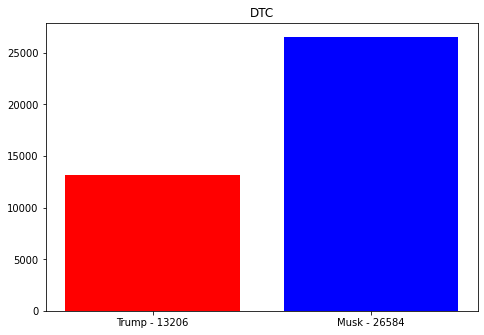

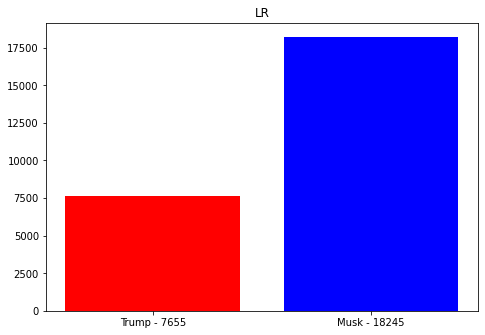

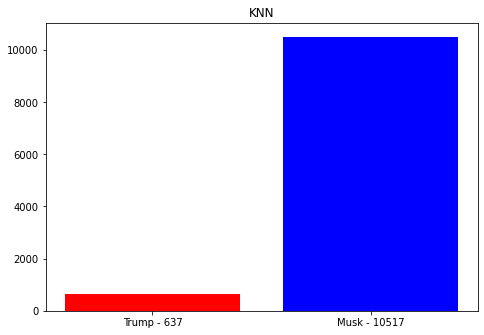

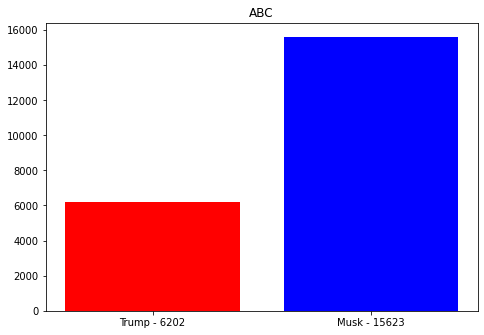

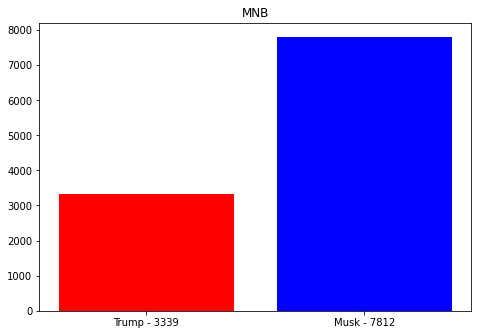

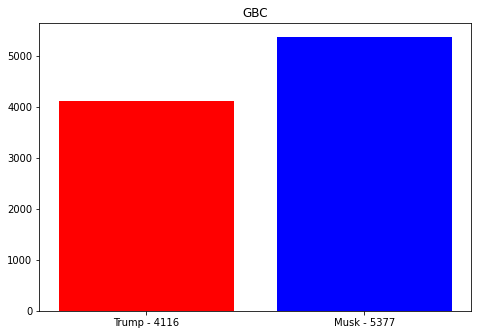

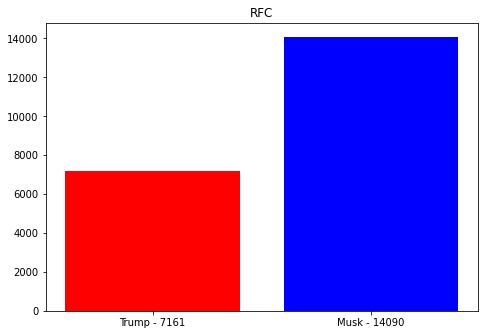

In [33]:
predictAndVisualize(pred_musk_X_test,pred_trump_X_test, loadModel('dtc'), 'DTC')
predictAndVisualize(pred_musk_X_test,pred_trump_X_test, loadModel('lr'), 'LR')
predictAndVisualize(pred_musk_X_test,pred_trump_X_test, loadModel('knn'), 'KNN')
predictAndVisualize(pred_musk_X_test,pred_trump_X_test, loadModel('abc'), 'ABC')
predictAndVisualize(pred_musk_X_test,pred_trump_X_test, loadModel('mnb'), 'MNB')
predictAndVisualize(pred_musk_X_test,pred_trump_X_test, loadModel('gbc'), 'GBC')
predictAndVisualize(pred_musk_X_test,pred_trump_X_test, loadModel('rfc'), 'RFC')


In [34]:
pred_trump_df.head()


,Unnamed: 0,tweet,cleaned,DTC_Abusive,LR_Abusive,KNN_Abusive,ABC_Abusive,MNB_Abusive,GBC_Abusive,RFC_Abusive
0,NaN,Donald Trump will never be President. \nYe will never be President. #YE24,Donald Trump never President Ye never President YE,0,0,0,0,0,0,0
1,NaN,"Congratulations USMT Soccer! Somewhere, someway, Donald Trump is going to take credit for this....",Congratulations USMT Soccer Somewhere someway Donald Trump going take credit WorldCup USAvIRN US...,0,0,0,0,0,0,0
2,NaN,Donald Trump is turning the the peoples against us with chemicals.,Donald Trump turning peoples us chemicals,0,0,0,0,0,0,0
3,NaN,"Somewhere out there Donald Trump is trying to guess his Twitter password, giving up and resettin...",Somewhere Donald Trump trying guess Twitter password giving resetting told new password differen...,0,0,0,0,0,0,0
4,NaN,"YES, water pollution is real but green unicorns doing the dishes in Donald Trump's attic are not...",YES water pollution real green unicorns dishes Donald Trump attic,0,0,0,0,0,0,0


In [35]:
pred_musk_df.head()

,tweet,cleaned,DTC_Abusive,LR_Abusive,KNN_Abusive,ABC_Abusive,MNB_Abusive,GBC_Abusive,RFC_Abusive
0,How can anyone take Elon Musk seriously when he speaks with such incredibly cringeworthy languag...,anyone take Elon Musk seriously speaks incredibly cringeworthy language People respect fortune f...,0,0,0,0,0,0,0
1,".@elonmusk \n\nIs, or will #Twitter #Spaces eventually be end2end encrypted for security and for...",elonmusk Twitter Spaces eventually endend encrypted security protection communications snooping ...,0,0,0,0,0,0,0
2,So I was locked out of my account for unusual activity. Had to verify my phone number .Nope I’ve...,locked account unusual activity verify phone number Nope ’ threaten one spammed anyone tweet lot...,0,0,0,0,0,0,0
3,A tour do @MCRashid com o “álbum novo na quinta” me fez rir demais. Não dá! Hahahahaha\nElon Mus...,tour MCRashid com álbum novo na quinta fez rir demais Não dá Hahahahaha Elon Musk fdp hahahha,0,0,0,0,0,0,0
4,Elon Musk we still have some trolls messing with system.,Elon Musk still trolls messing system,0,0,0,0,0,0,0


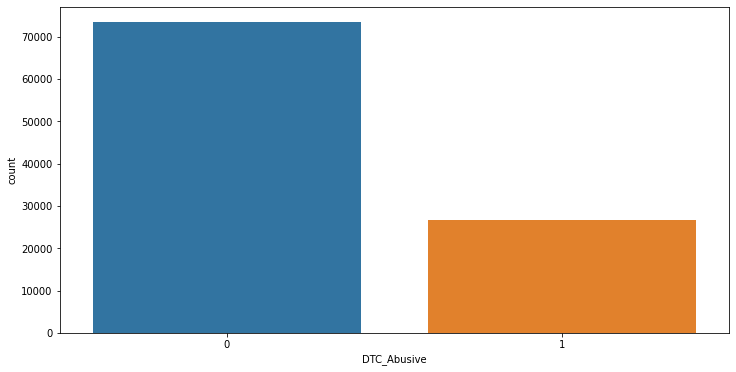

In [39]:
temp = train_df.groupby('Abusive').count()['tweet'].reset_index().sort_values(by='tweet',ascending=False)
temp.style.background_gradient(cmap='Purples')

from plotly import graph_objs as go
plt.figure(figsize=(12,6))
sns.countplot(x='DTC_Abusive',data=pred_trump_df)
fig = go.Figure(go.Funnelarea(
    text =temp.Abusive,
    values = temp.tweet,
    title = {"position": "top center", "text": "Funnel-Chart of Trump Dataset"}
    ))
fig.show()

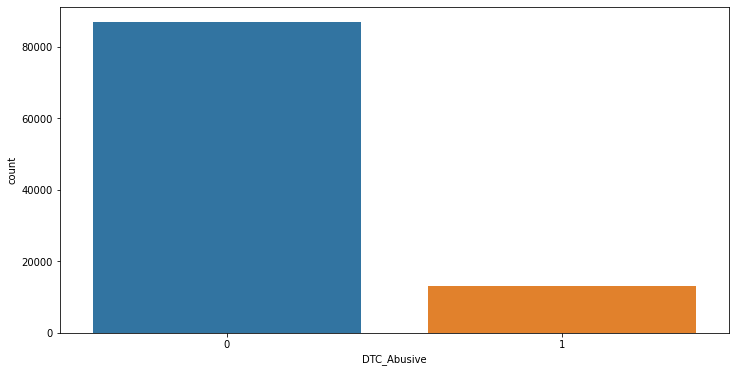

In [40]:
temp = train_df.groupby('Abusive').count()['tweet'].reset_index().sort_values(by='tweet',ascending=False)
temp.style.background_gradient(cmap='Purples')

from plotly import graph_objs as go
plt.figure(figsize=(12,6))
sns.countplot(x='DTC_Abusive',data=pred_musk_df)
fig = go.Figure(go.Funnelarea(
    text =temp.Abusive,
    values = temp.tweet,
    title = {"position": "top center", "text": "Funnel-Chart of Musk Dataset"}
    ))
fig.show()